In [1]:
%matplotlib inline

import os
import json

import numpy as np
from skimage.io import imread

import matplotlib.pyplot as plt
import pylab

SEED = 10
np.random.seed(SEED)

In [2]:
## TODO: Change the location here to your dataset directory.
SRC_DIR = "./tutorial_ade20k_pascal/"
DATASET_DIR = os.path.join(SRC_DIR, "VOCdevkit/VOC2012/")
IMG_DIR = os.path.join(DATASET_DIR, 'JPEGImages')
SEG_DIR = os.path.join(DATASET_DIR, 'SegmentationClass')

## TODO: Set to either "val" or "train"
PARTITION = "val"

In [7]:
labelmap

{'background': '0',
 'door | doorframe, doorcase | double door': '1',
 'bed | bedpost': '2',
 'wardrobe, closet, press': '3',
 'lamp': '4',
 'chest of drawers, chest, bureau, dresser': '5',
 'pillow': '6',
 'armchair | chair | swivel chair': '7',
 'pane, pane of glass, window glass | windowpane, window': '8',
 'curtain, drape, drapery, mantle, pall': '9'}

In [8]:
# Read in the labelmap
with open(os.path.join(SRC_DIR, "labelmap.json")) as rf:
    # Label mapping in the file is reversed since integers cannot
    # be JSON keys.
    labelmap_str = json.load(rf)
    labelmap = {int(k): v for (k, v) in labelmap_str.items()}
    
print(labelmap)

{0: 'background', 1: 'door | doorframe, doorcase | double door', 2: 'bed | bedpost', 3: 'wardrobe, closet, press', 4: 'lamp', 5: 'chest of drawers, chest, bureau, dresser', 6: 'pillow', 7: 'armchair | chair | swivel chair', 8: 'pane, pane of glass, window glass | windowpane, window', 9: 'curtain, drape, drapery, mantle, pall'}


In [9]:
# Reads the text file to detect the names of all sample instances in the
# partition of interest.
partition_filepath = os.path.join(DATASET_DIR, f"ImageSets/Segmentation/{PARTITION}.txt")
with open(partition_filepath) as rf:
    samples = rf.readlines()
    samples = [sample.strip() for sample in samples]


## Display Segmentation Masks

In [10]:
def display(sample_name):
    """
    Display a single sample in 3 subplots: the image, the segmentation
    and both overlayed one on top of another.
    """
    img_path = os.path.join(IMG_DIR, f"{sample_name}.jpg")
    seg_path = os.path.join(SEG_DIR, f"{sample_name}.png")
    
    print(img_path, seg_path)
    
    plt.figure(dpi=300, figsize=(9, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(imread(img_path))
    plt.title("Image")
    
    plt.subplot(1, 3, 2)
    plt.imshow(imread(seg_path))
    plt.title("Segmentation")
    
    plt.subplot(1, 3, 3)
    plt.imshow(imread(img_path))
    plt.imshow(imread(seg_path), alpha=0.5)
    plt.title("Overlay")


def display_by_label(sample_name):
    """
    Displays the segmentation for each label in the image overlayed
    on the image. Also makes a call to display() and shows everything
    from that function first.
    """
    img_path = os.path.join(IMG_DIR, f"{sample_name}.jpg")
    seg_path = os.path.join(SEG_DIR, f"{sample_name}.png")
    
    img = imread(img_path)
    seg = imread(seg_path)
    label_ids = np.unique(seg)
    
    print(f"Unique ids: {label_ids}")
    print(f"Text labels: {[labelmap[label] for label in label_ids]}")
    
    # Call the display() function to show the entire segmentation overlay
    display(sample_name)
    
    # Now, display a new figure with overlays of individual labels.
    n_rows = int(np.ceil(len(label_ids) / 3))
    plt.figure(dpi=300, figsize=(9, (3 * n_rows)))
    
    for idx, lid in enumerate(label_ids):
        ax = plt.subplot(n_rows, 3, idx+1)
        label = labelmap[lid]
        ax.imshow(img)
        ax.imshow(seg==lid, alpha=0.5)
        ax.set_title(label)

# Display Random Images

Unique ids: [0 2 4 6 9]
Text labels: ['background', 'bed | bedpost', 'lamp', 'pillow', 'curtain, drape, drapery, mantle, pall']
./tutorial_ade20k_pascal/VOCdevkit/VOC2012/JPEGImages/ADE_val_00000245.jpg ./tutorial_ade20k_pascal/VOCdevkit/VOC2012/SegmentationClass/ADE_val_00000245.png


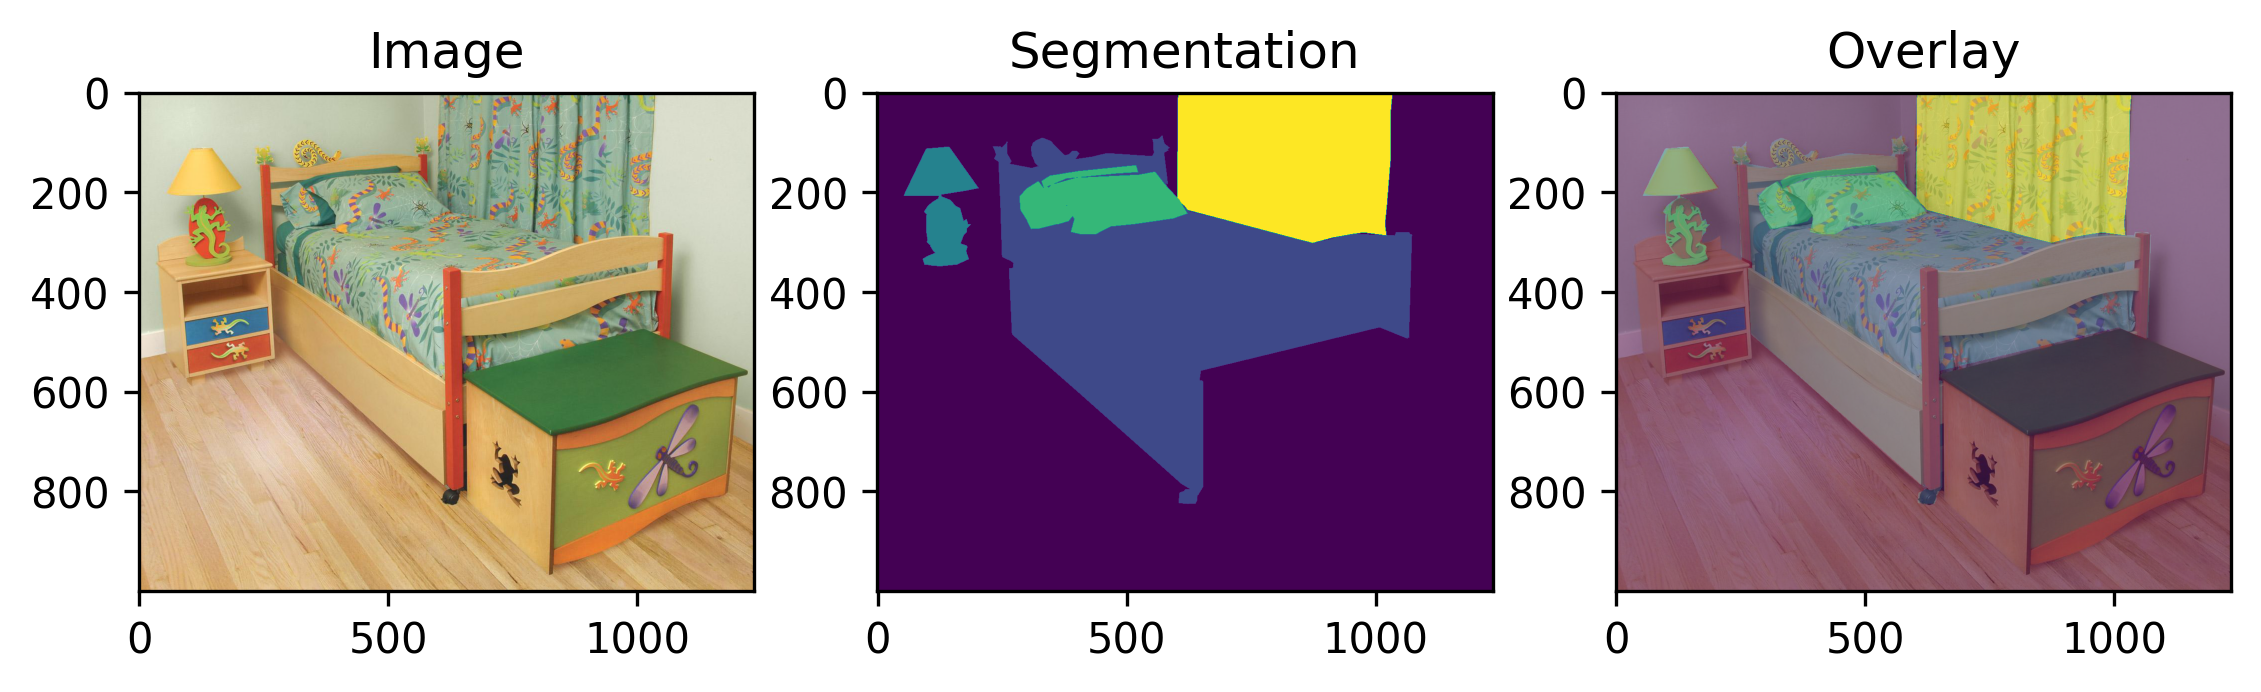

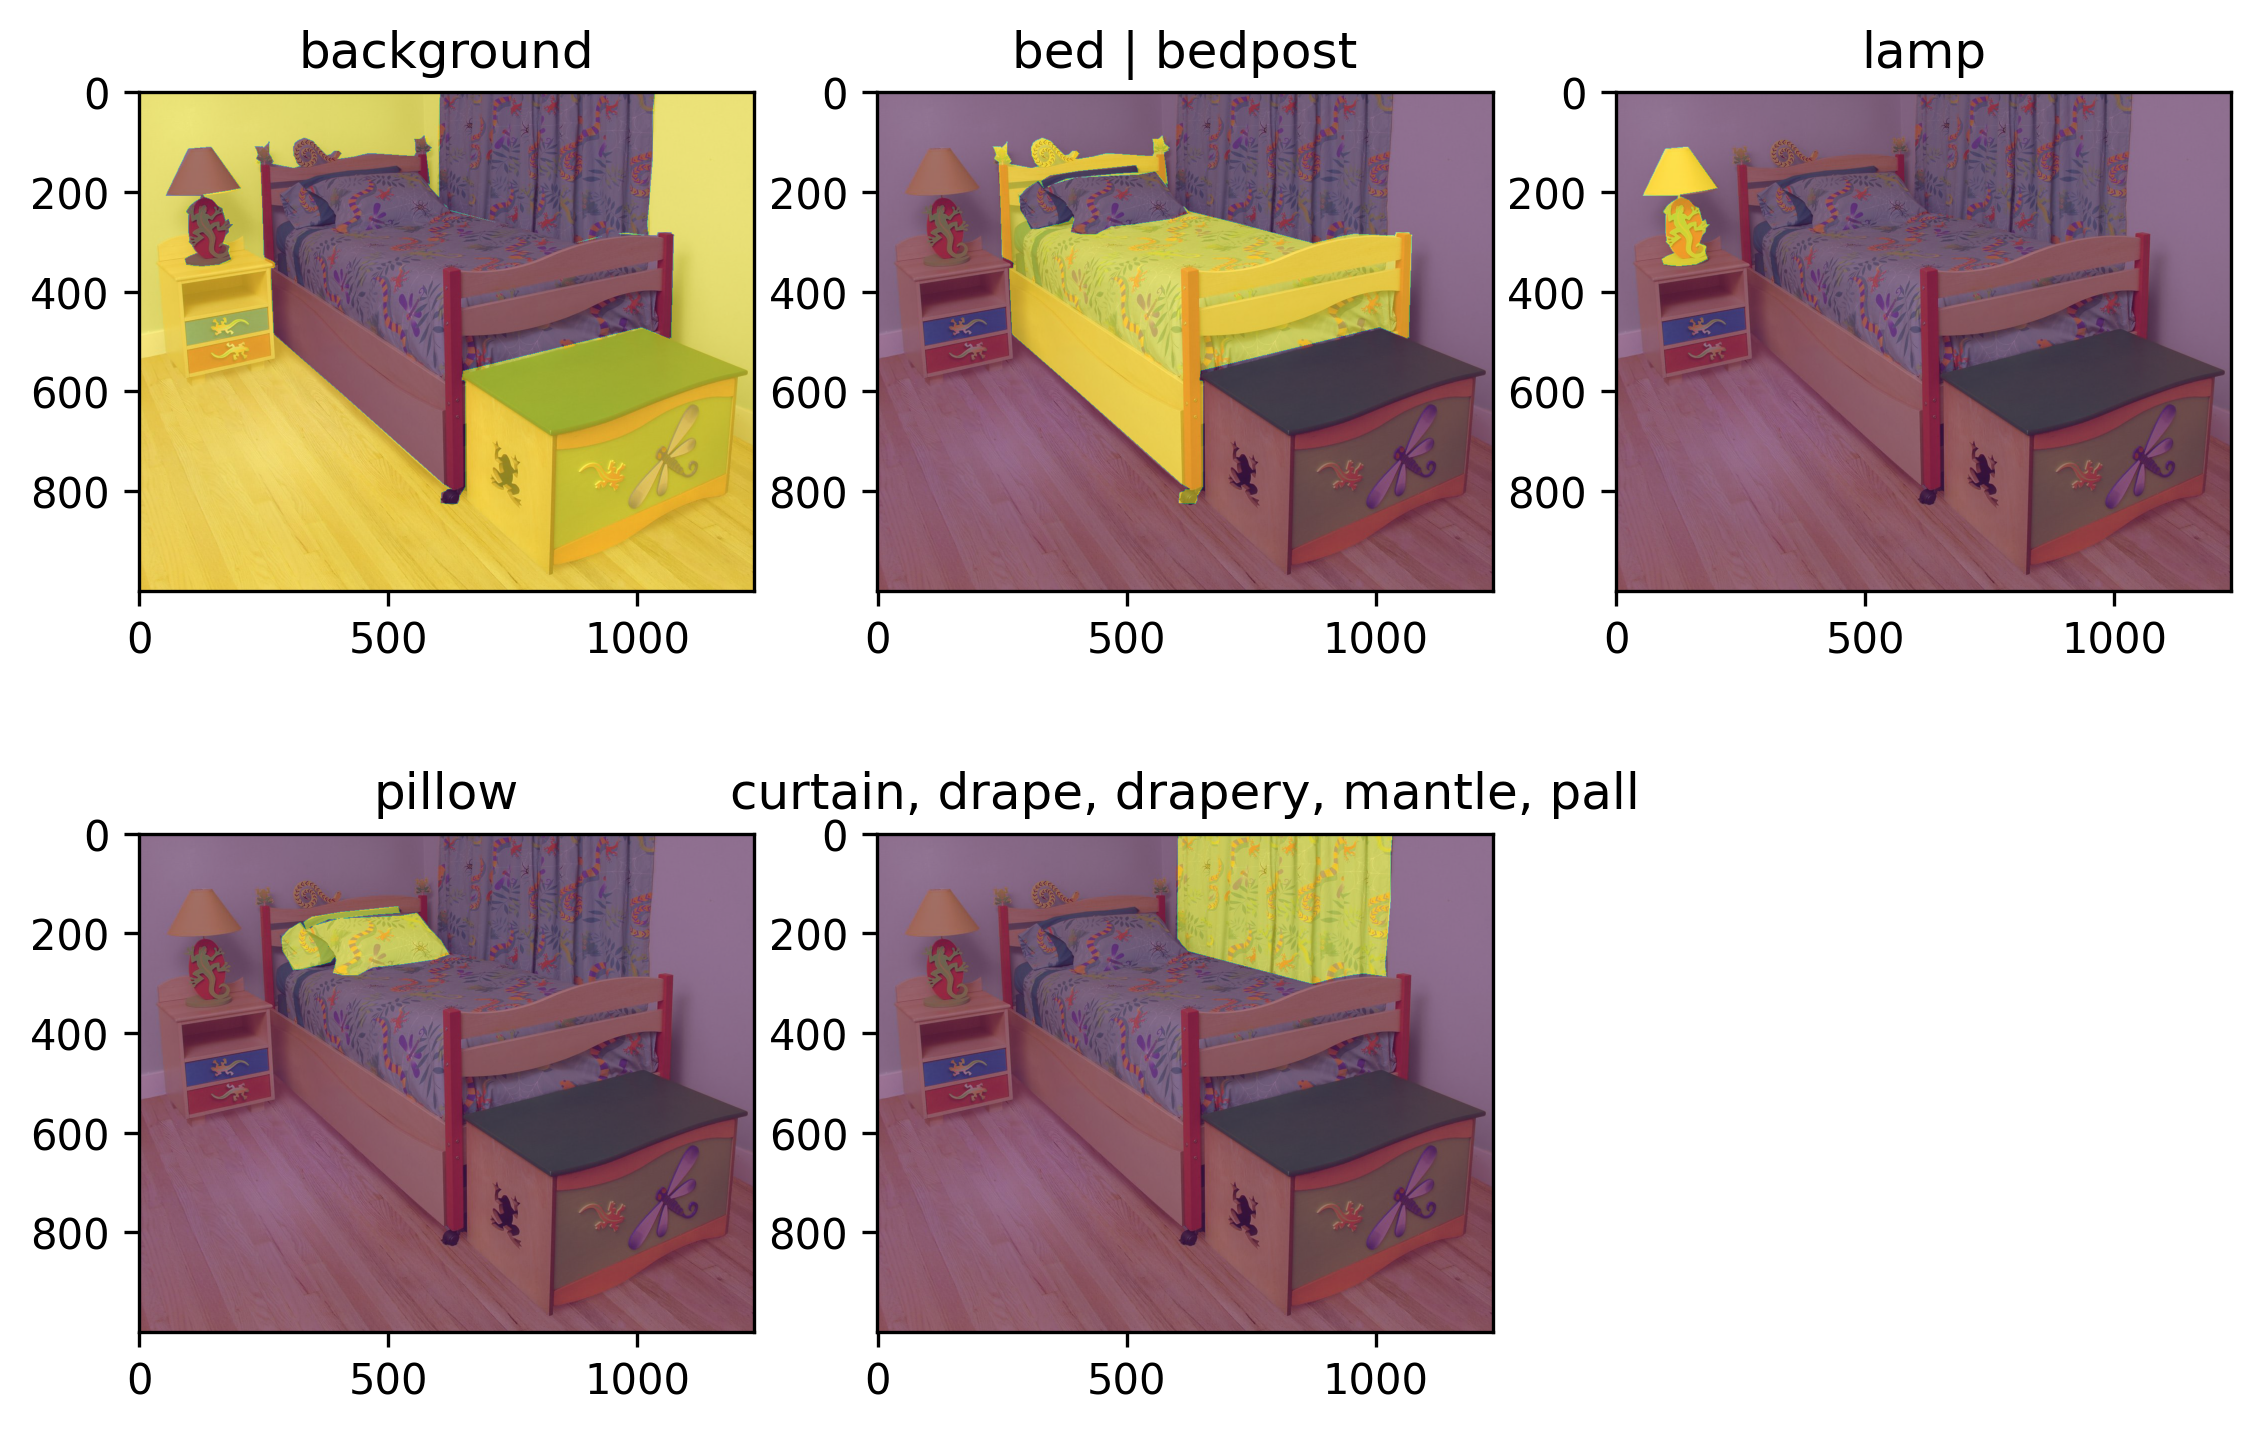

In [11]:
display_by_label(np.random.choice(samples))

Unique ids: [0 2 4 6]
Text labels: ['background', 'bed | bedpost', 'lamp', 'pillow']
./tutorial_ade20k_pascal/VOCdevkit/VOC2012/JPEGImages/ADE_val_00000177.jpg ./tutorial_ade20k_pascal/VOCdevkit/VOC2012/SegmentationClass/ADE_val_00000177.png


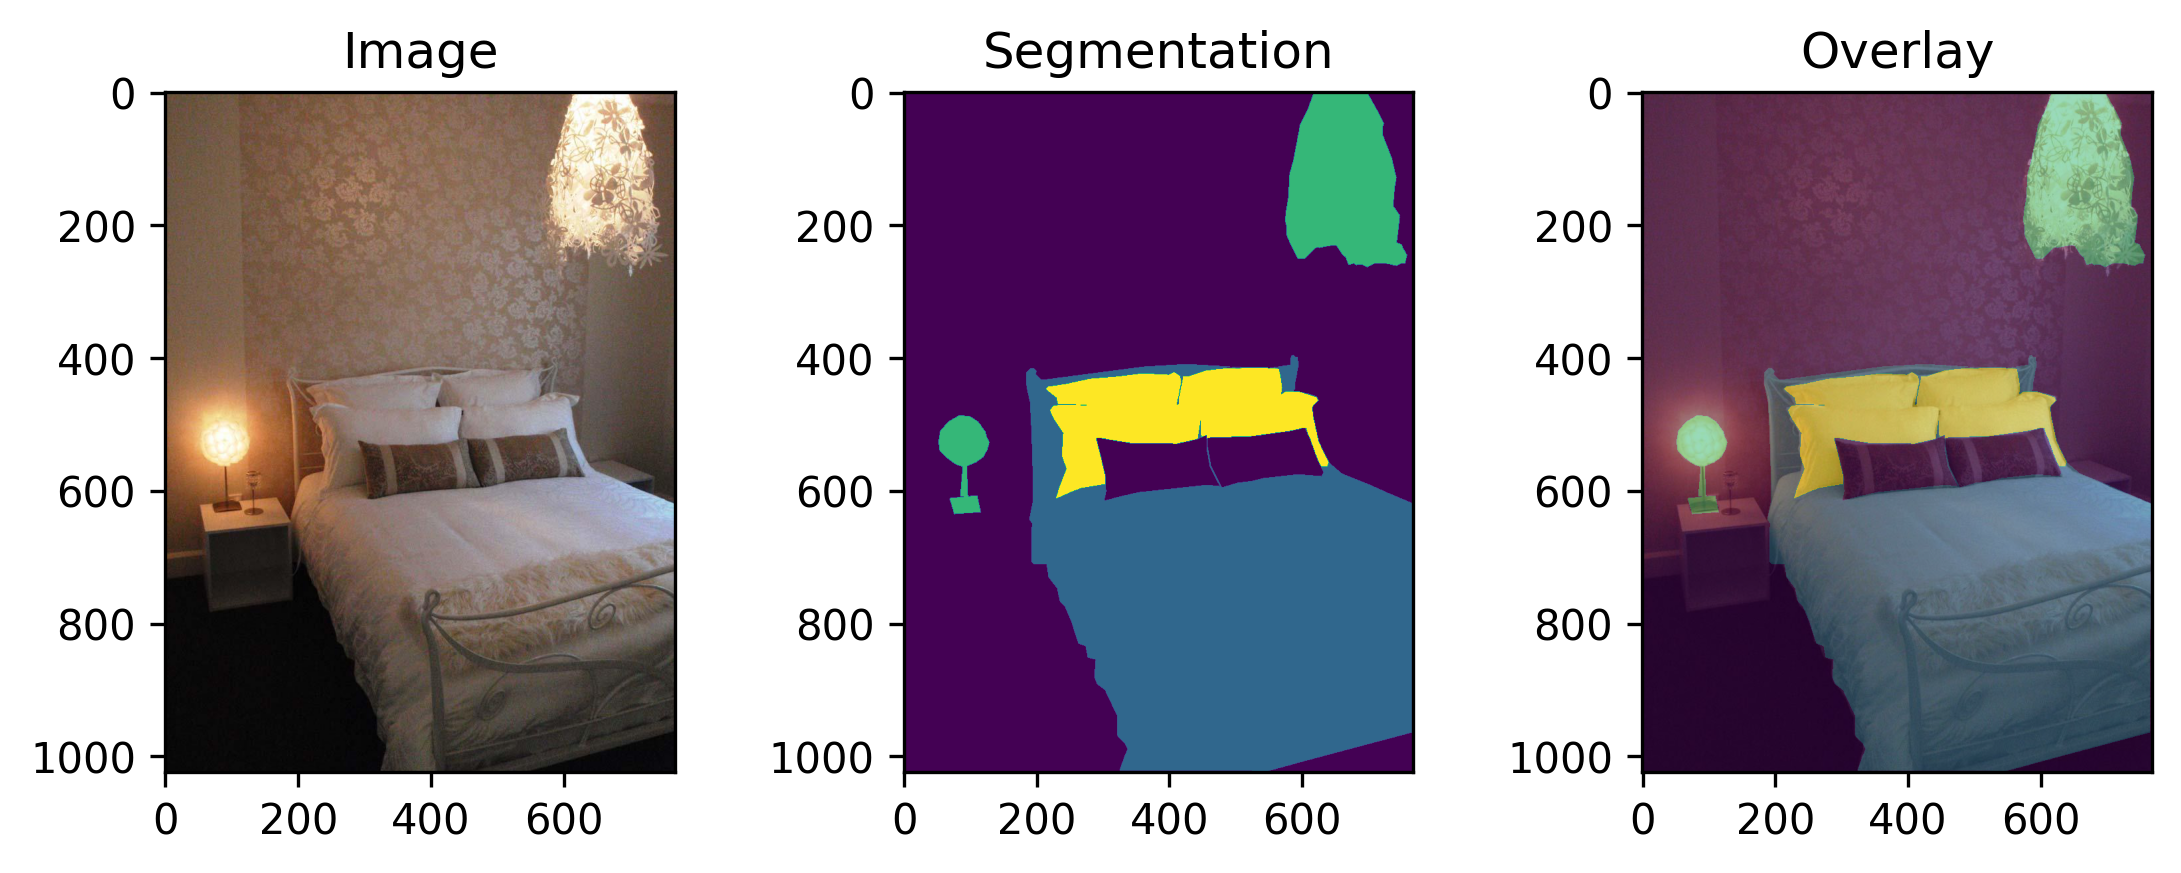

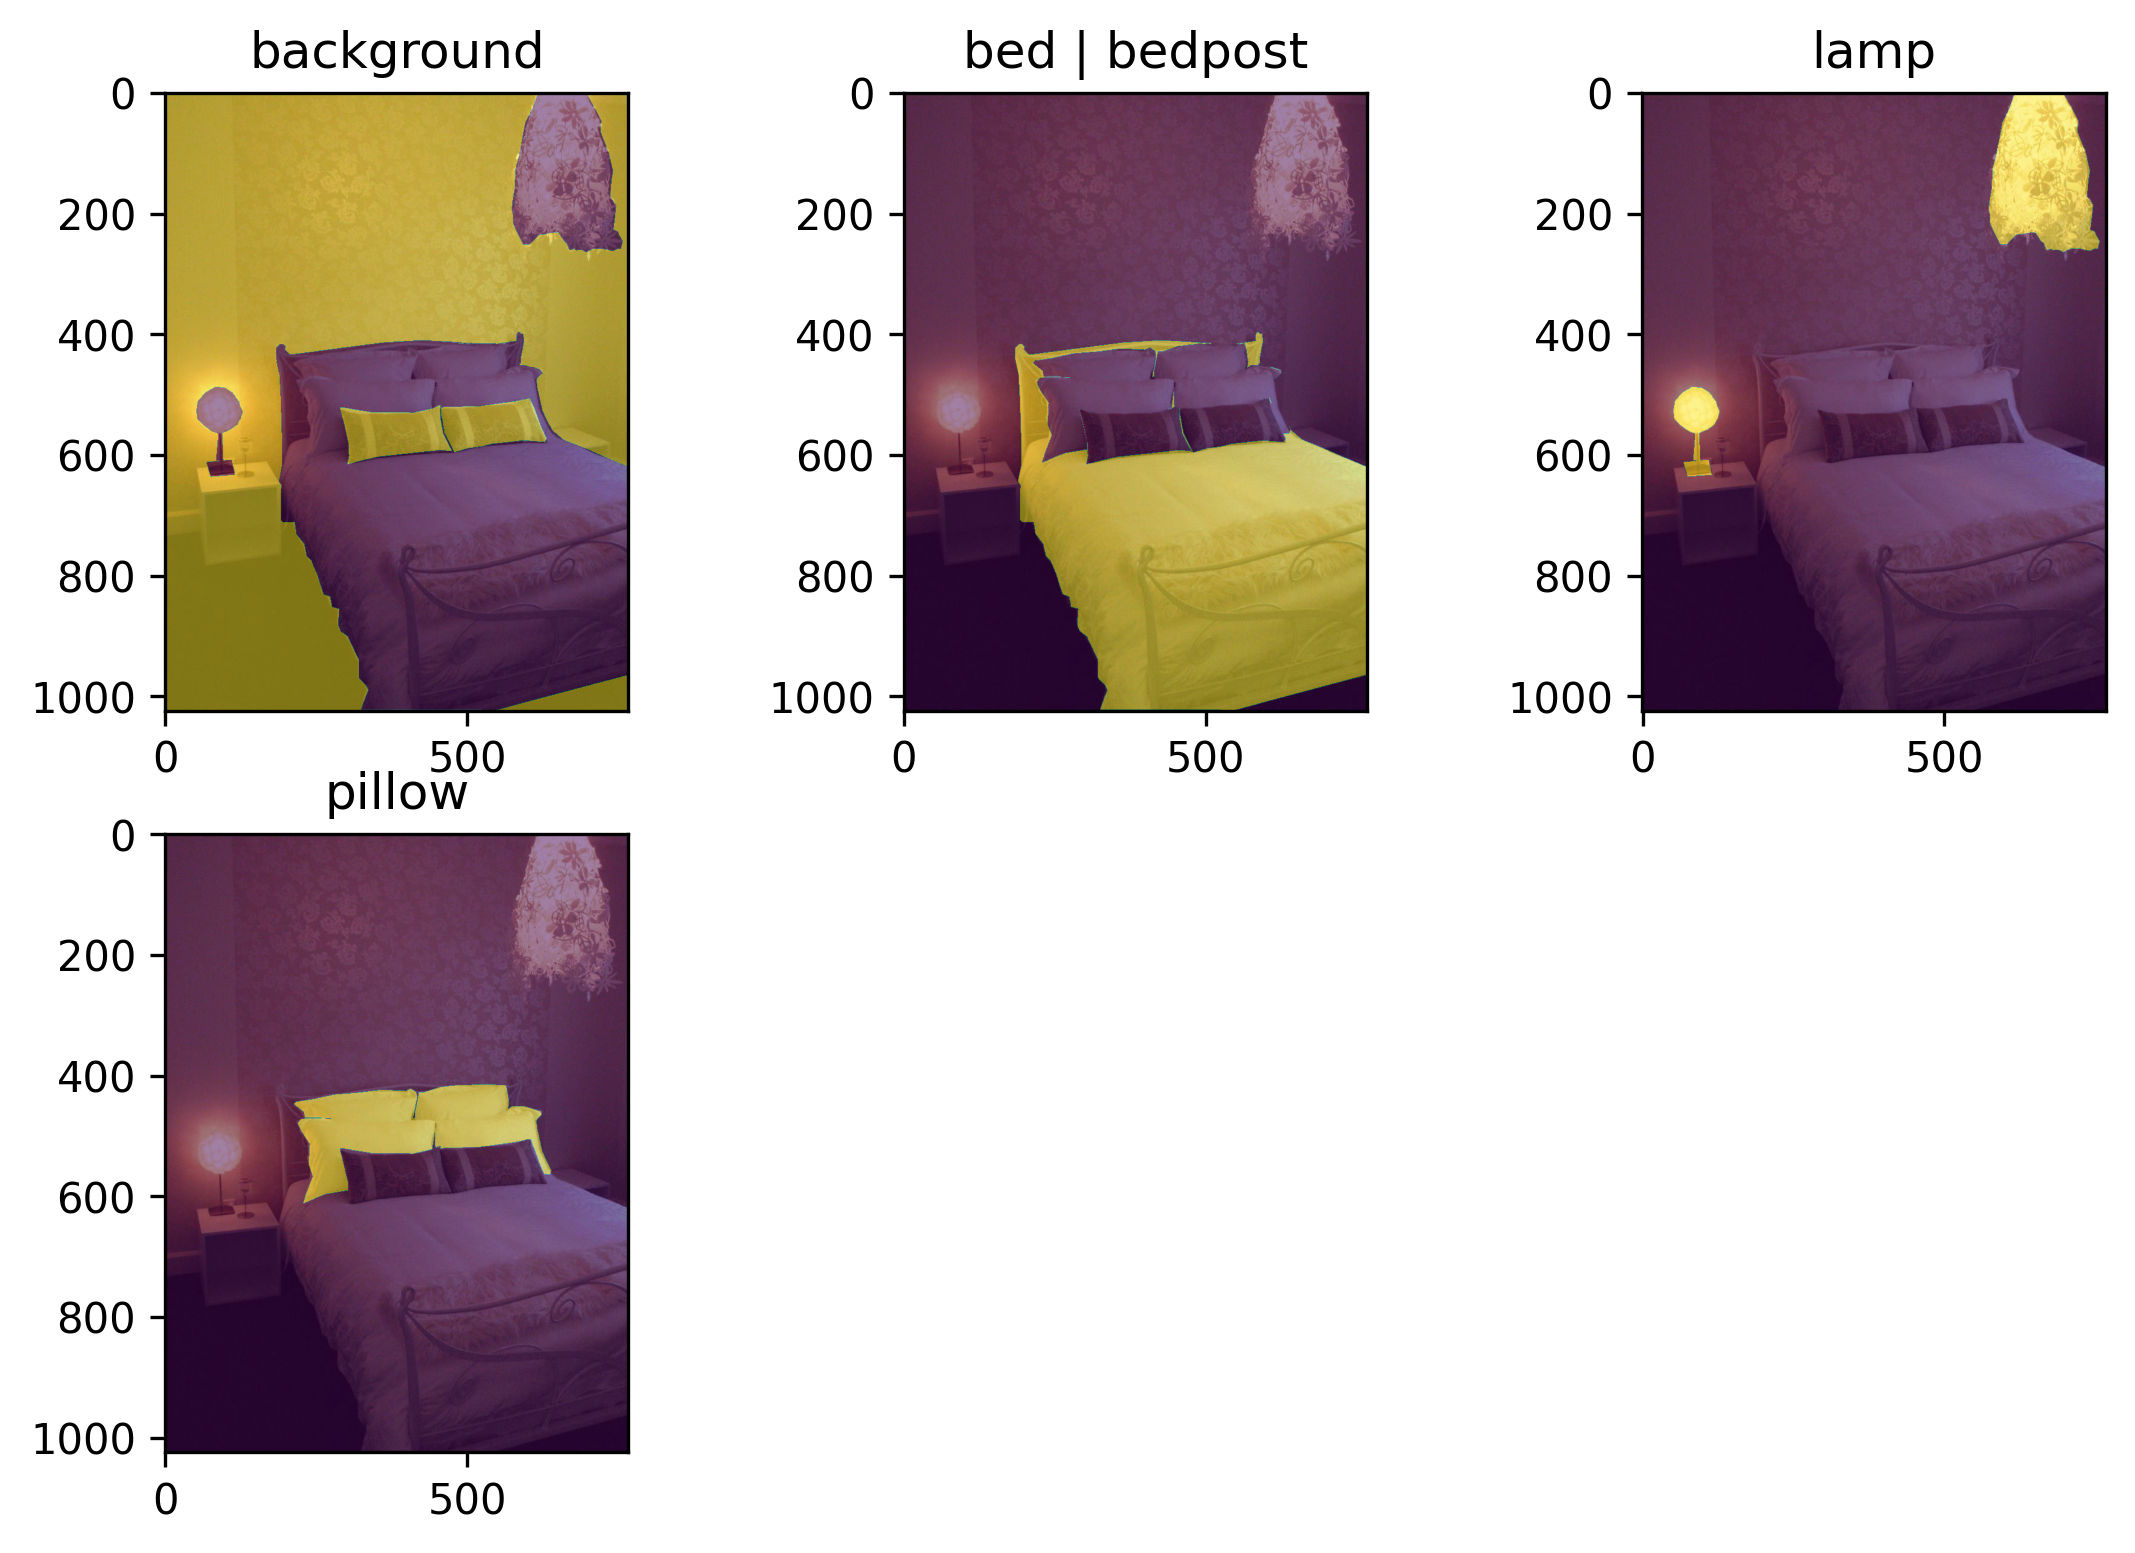

In [12]:
display_by_label(np.random.choice(samples))

Unique ids: [0 2 4 6 7 9]
Text labels: ['background', 'bed | bedpost', 'lamp', 'pillow', 'armchair | chair | swivel chair', 'curtain, drape, drapery, mantle, pall']
./tutorial_ade20k_pascal/VOCdevkit/VOC2012/JPEGImages/ADE_val_00000163.jpg ./tutorial_ade20k_pascal/VOCdevkit/VOC2012/SegmentationClass/ADE_val_00000163.png


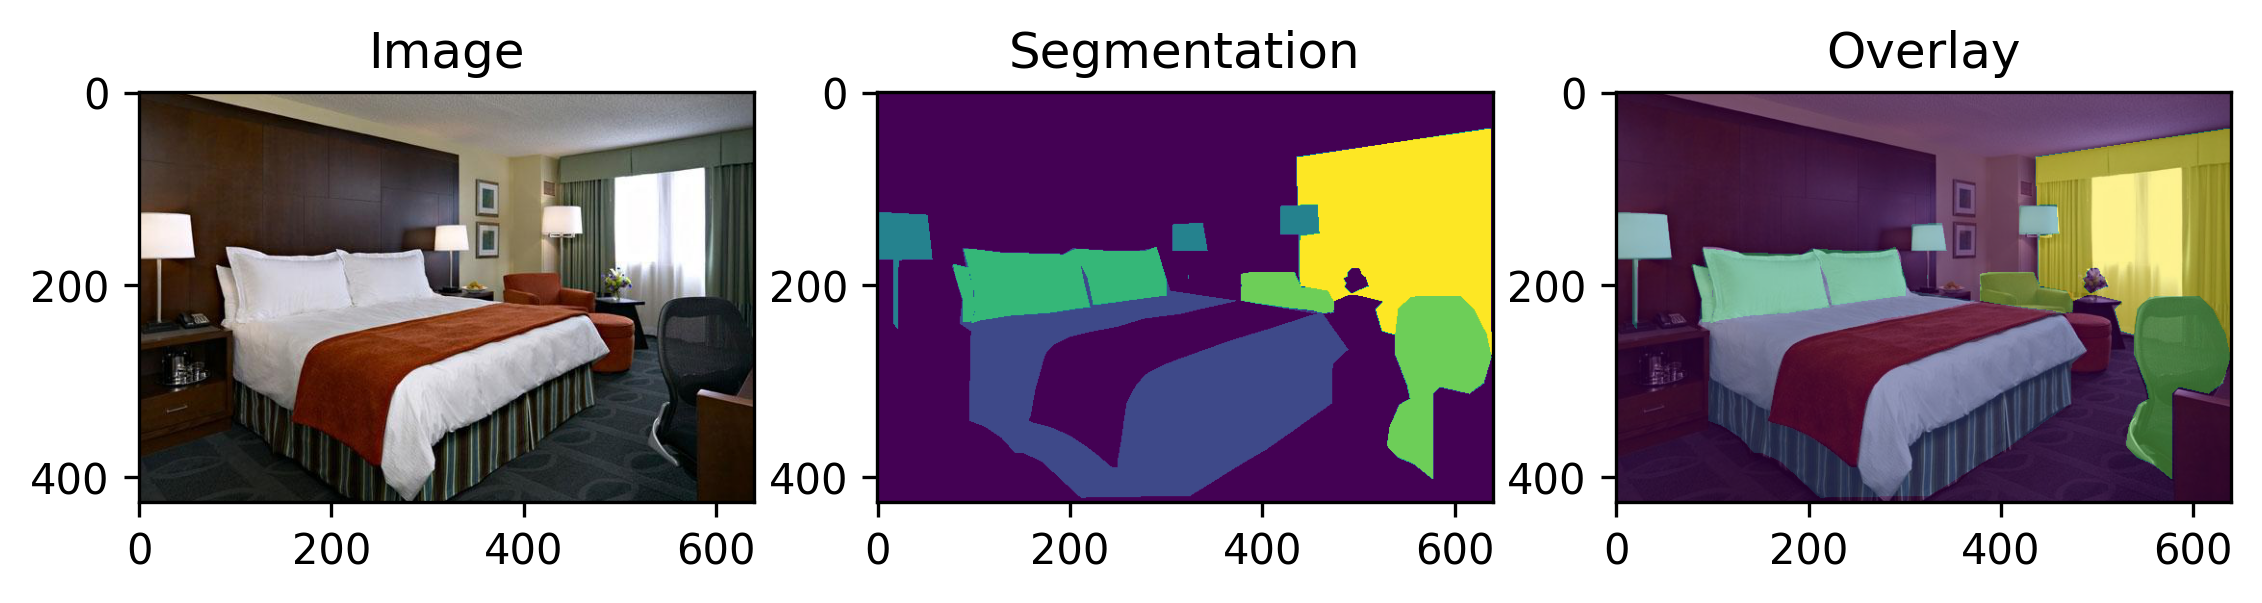

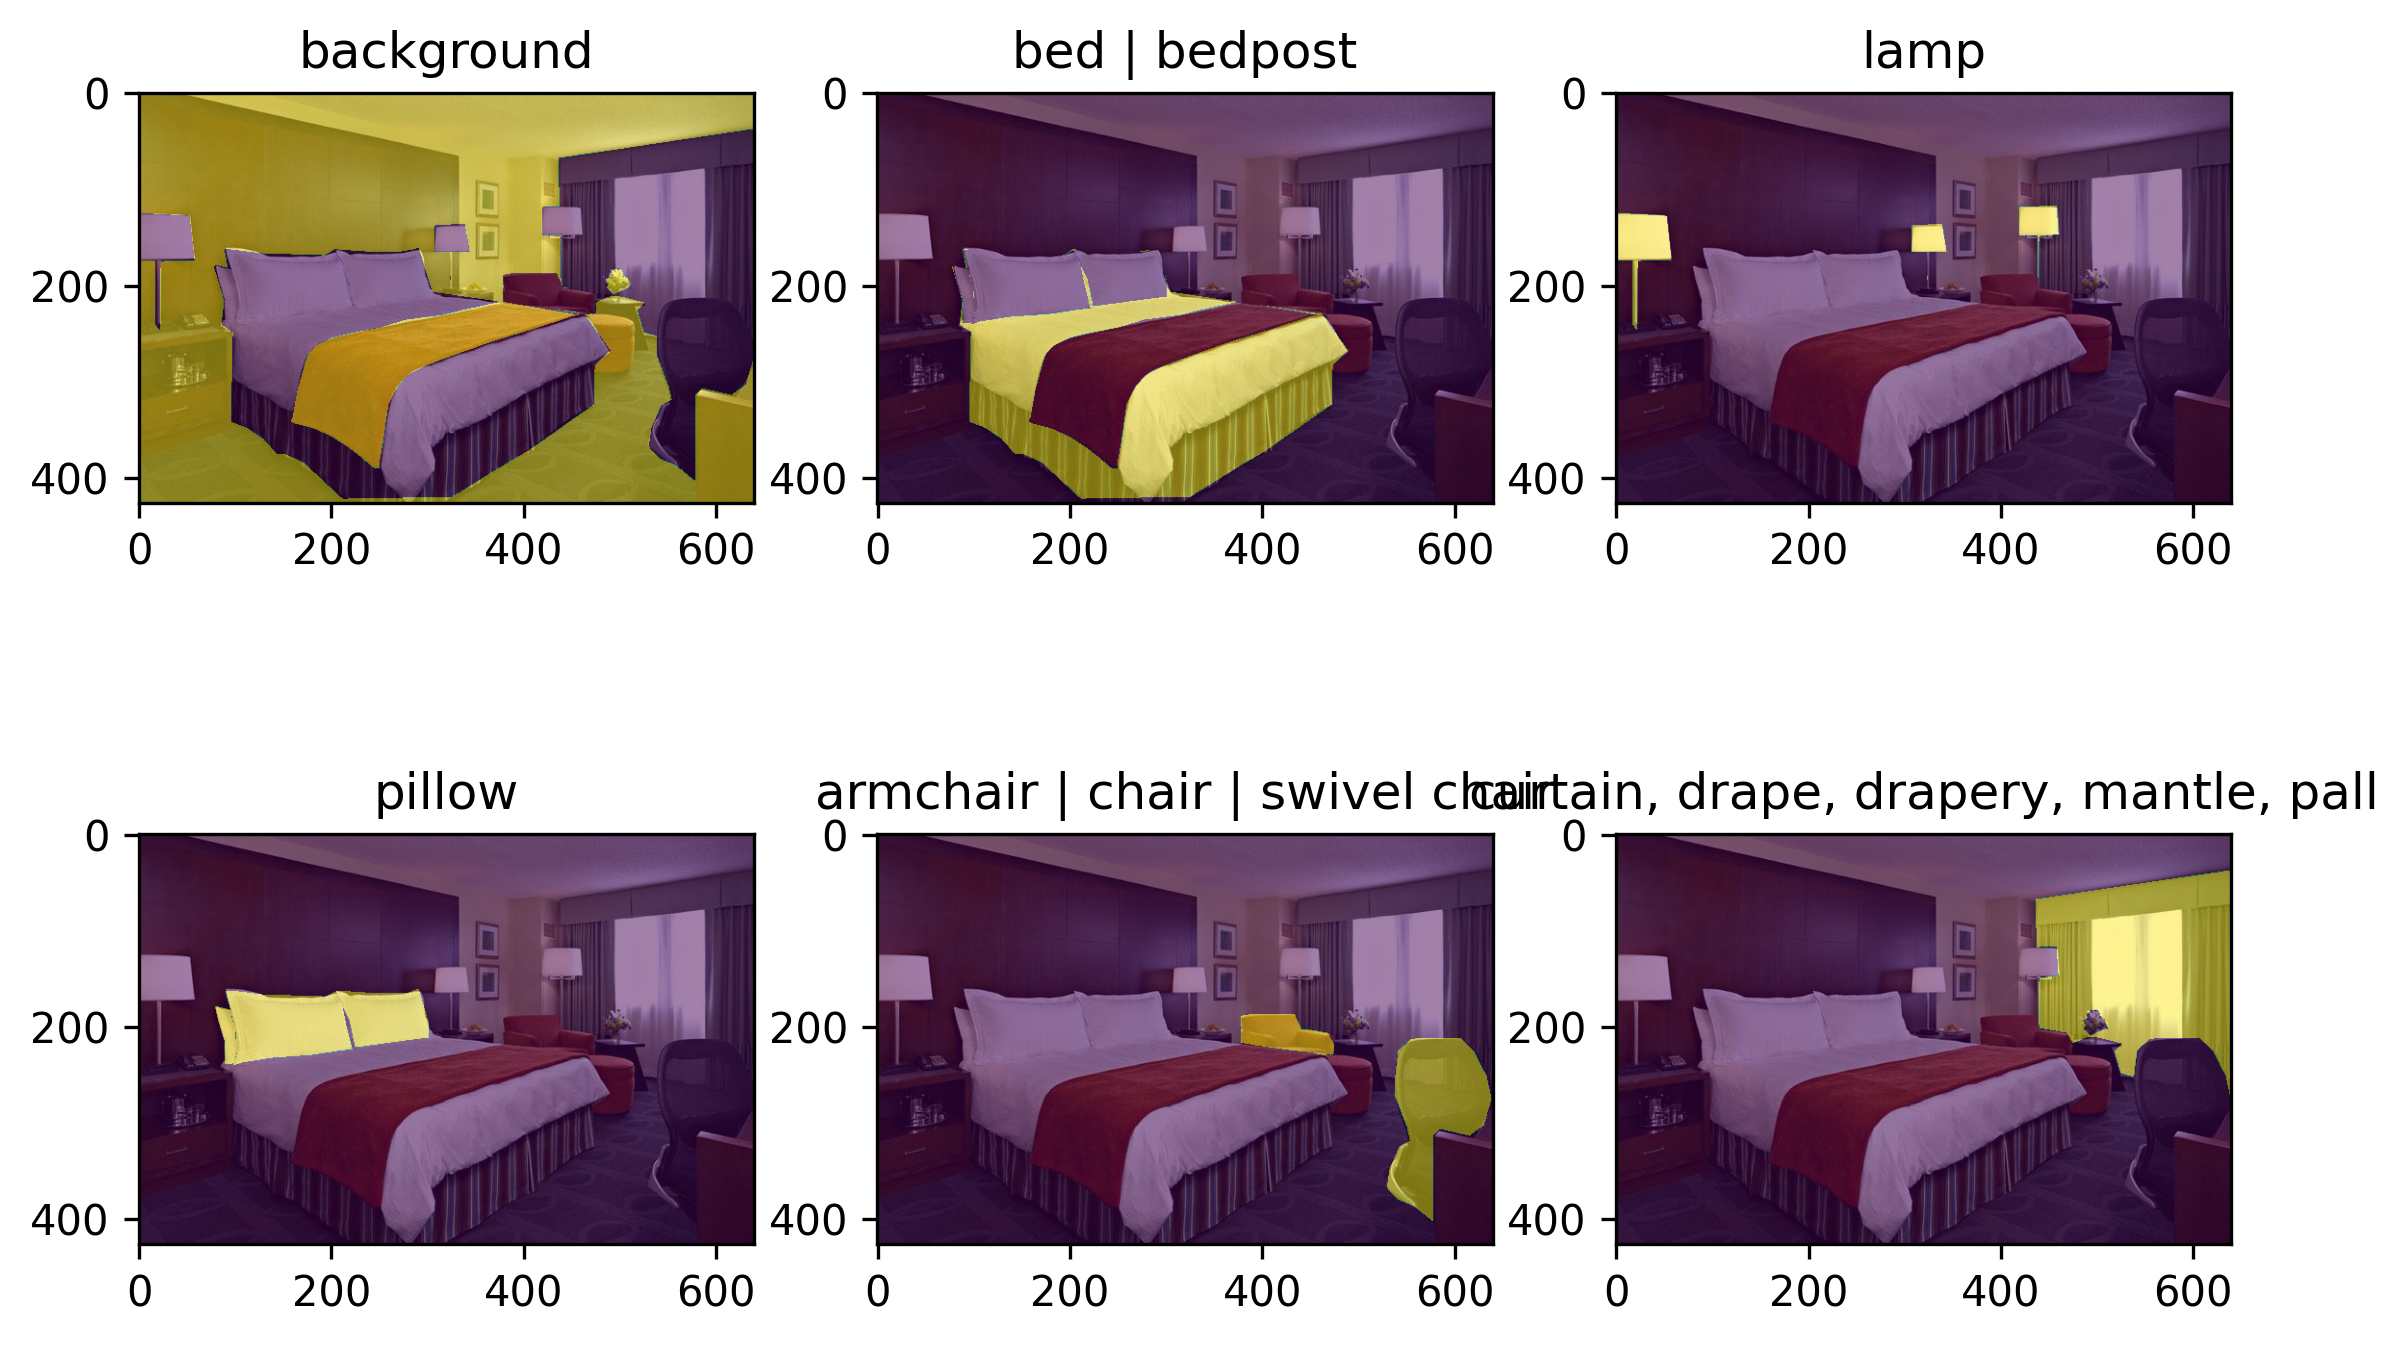

In [13]:
display_by_label(np.random.choice(samples))